# P411 - Assignment 3
Kristi Webb, Sept 18 2015

github k-a-webb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Q1: Lag correlations of weather time series

**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

<hr>

In [2]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb = hourdata[1,:]
dcc = dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

Nt = len(dc)
t = np.arange(Nt) # [hours]
days = t/24
dc -= np.mean(dc)

In [3]:
def lag_corr_coeff(x,y,lags):
    c_xy=np.zeros_like(lags)
  
    for ind,tau in enumerate(lags):
        if tau<0:
            c_xy[ind]=np.mean(x[:tau]*y[-tau:])
        elif tau==0:
            c_xy[ind]=np.mean(x*y)
        else:
            c_xy[ind]=np.mean(x[:-tau]*y[tau:])
    return c_xy, c_xy/(np.std(x)*np.std(y))

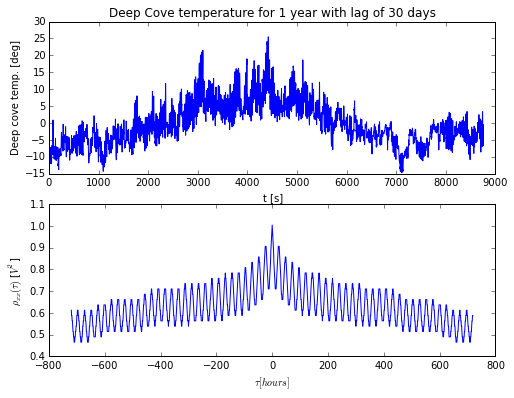

In [4]:
dc_30d = dc[:24*365] # One year's worth of data
t_30d = t[:24*365]

lags = range(-24*30,24*30) # the lags are integers
c_xx, rho_xx = lag_corr_coeff(dc_30d, dc_30d, lags)
tau = np.array(lags)*np.median(np.diff(t_30d))

fig,axs=plt.subplots(2,1,figsize=(8,6))

axs[0].plot(t_30d, dc_30d)
axs[0].set_xlabel('t [s]') ; axs[0].set_ylabel('Deep cove temp. [deg]')
axs[0].set_title('Deep Cove temperature for 1 year with lag of 30 days')

#axs[1].plot(tau, c_xx)    
axs[1].plot(tau, rho_xx)    
axs[1].set_xlabel(r'$\tau [hours]$') ; axs[1].set_ylabel(r'$\rho_{xx}(\tau)$ [$V^2$]')
#axs[1].set_title('Lag auto-covariance of Deep Cove temperature for 30 days')

plt.show()

We can see that the temperature fluctuates over the coarse of a year, where the temperature is higher during the summer months (which is what we expect, being in the Northern hemisphere). The lag correlation coefficient peaks at tau = 0, and has smaller peaks at approximately 24h intervals. We can interpret this as the temperature is most similar every 24h, and least similar at the midpoint of the cycle (ie 7pm Tuesday is most like 7pm Wednesday, and least like 7am Wednesday)

<hr>
*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.
<hr>

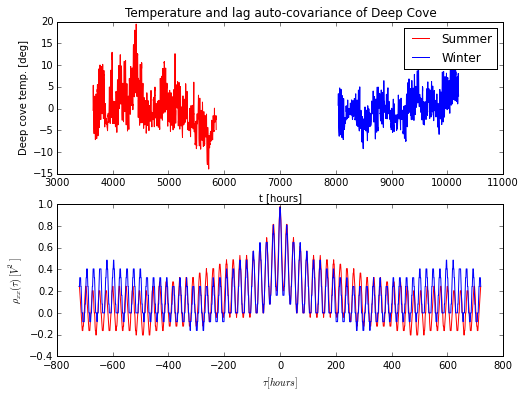

In [5]:
# Temperature data begins Jan. 1st

def splice(data, start, end):
    data_s = data[start:end]
    data_s -= np.mean(data_s)
    return data_s

# Calculate range of data in Summer/Winter
dc_summer = splice(dc, 152*24, 244*24) # Summer begins June 1st, ends Sept 1st
t_summer = t[24*152:24*244]

dc_winter = splice(dc, 335*24, 425*24)  # Winter begins Dec 1st, ends Mar 1st
t_winter = t[24*335:24*425]


# Calculate rho_xx for each data set
tau_summer = np.array(lags)*np.median(np.diff(t_summer))
c_xx_summer, rho_xx_summer = lag_corr_coeff(dc_summer, dc_summer, lags)

tau_winter = np.array(lags)*np.median(np.diff(t_winter))
c_xx_winter, rho_xx_winter = lag_corr_coeff(dc_winter, dc_winter, lags)


# Plot
fig,axs=plt.subplots(2,1,figsize=(8,6))

axs[0].plot(t_summer, dc_summer, '-r', label="Summer")
axs[0].plot(t_winter, dc_winter, '-b', label="Winter")
axs[0].set_xlabel('t [hours]') ; axs[0].set_ylabel('Deep cove temp. [deg]')
axs[0].legend()

axs[1].plot(tau_summer, rho_xx_summer, '-r', label="Summer")
axs[1].plot(tau_winter, rho_xx_winter, '-b', label="Winter")
axs[1].set_xlabel(r'$\tau [hours]$') ; axs[1].set_ylabel(r'$\rho_{xx}(\tau)\ [V^2]$')

axs[0].set_title('Temperature and lag auto-covariance of Deep Cove') ; plt.show()

The lag correlation of summer and winter have the same periodicity, but slightly different amplitudes. The amplitudes in winter are smaller, which we can attribute to the day time temperatures being closer to the night time temperatures, whereas in summer the temperatures fluxuate more.

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}
<hr>

\begin{equation}
    R_{xx}(\tau) 
     = E\left[x(t) \ x(t+\tau) \right] \\
     = E\left[\int_{t-b}^t y(t) \ \mathrm{dt} \ * \ \int_{t+\tau-b}^{t+\tau} y(t+\tau) \ \mathrm{d \tau}\right] \\
     = E \left[\int_{t-b}^t \int_{t+\tau-b}^{t+\tau} y(t) \ y(t+\tau) \  \mathrm{d \tau} \mathrm{dt} \right]  \\
\end{equation}

Since E is a linear operator:

\begin{equation} 
     = \int_{t-b}^t \int_{t+\tau-b}^{t+\tau} \ E\left[ y(t) \ y(t+\tau) \right] \ \mathrm{d \tau} \ \mathrm{dt}  \\
\end{equation}

From the definition of $R_{yy}$:

\begin{equation}
    R_{yy}(\tau)=
    \begin{cases}
        \tau & \tau \neq 0\\
        \infty & \tau = 0
    \end{cases}
\end{equation}

\begin{equation}     
     R_{xx} = \int_{t-b}^t \int_{t+\tau-b}^{t+\tau} \ \delta(\tau) \ \mathrm{d \tau} \ \mathrm{dt}  \\
\end{equation}

We now consider the bounds of integration of the inside integral (i.e. over d$\tau$)

for $\tau \geq b$ (or similarly $\tau \leq -b$ : 

\begin{equation}     
     \int_{t+\tau-b}^{t+\tau} \ \delta(\tau) \ \mathrm{d \tau} \ \rightarrow \ 0 \\
\end{equation}

for $0 < \tau \leq b$: 

\begin{equation}     
     \int_{t+\tau-b}^{t+\tau} \ \delta(\tau) \ \mathrm{d \tau} \ \rightarrow \ 1 \\
\end{equation}

Now considering the outside integral, where the inside integral is one, we can simplify by changing the bounds:

\begin{equation}     
     t + \tau \ \rightarrow \ b - |\tau| \\
     t + \tau - b \ \rightarrow \ 0
\end{equation}

\begin{equation}     
     \int_{0}^{b - |\tau|} \ 1 \ \mathrm{dt} = b - |\tau| \\
\end{equation}

This gives us the expected result, where the result is a triangle function:

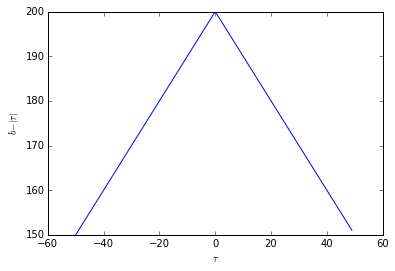

In [6]:
t = 50 ; b = 200
tt = np.arange(-t,t)
plt.plot(tt, b - np.abs(tt)) ; plt.xlabel(r'$\tau$') ; plt.ylabel(r'$b - |\tau|$')

And we can see that this is a triangle function.

<hr>
**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!
<hr>

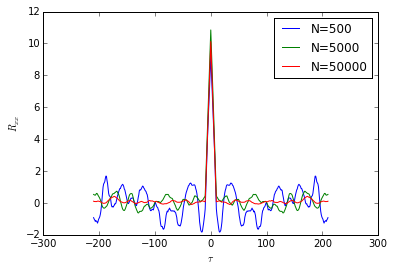

In [7]:
b = 10
bb = b + 200

def auto_lag_corr(x, taus):
    R = taus*0.
    for i, tau in enumerate(taus):
        if np.abs(tau) > 0:
            R[i] = np.mean(x[np.abs(tau):] * x[:-np.abs(tau)])
        else:
            R[i] = np.mean(x*x)
    return R

def calc_rxx(N, b, bb, plot=True):
    x = np.convolve(np.random.randn(N), np.ones(b), mode='valid')
    taus = np.arange(-bb, bb+1)

    R_xx = auto_lag_corr(x, taus)
    
    if plot:
        plt.plot(taus, R_xx, label='N={}'.format(N)) ; plt.xlabel(r'$\tau$') ; plt.ylabel(r'$R_{xx}$')
    return R_xx

R_xx_500 = calc_rxx(500, b, bb)
R_xx_5000 = calc_rxx(5000, b, bb)
R_xx_50000 = calc_rxx(50000, b, bb)
    
plt.legend()    

<hr>
**3** Derive (or look up) $S_{xx}(f)$ of this process:
<hr>

\begin{align}
    S_{xx} & = \int _{-b}^{b}\! \left( b+ \left| \tau \right|  \right) {{\rm e}^{-2\,
i\pi \,f\tau}}{d\tau} \\
    & = \frac{-1}{\left(2 \pi f \right)^2} \left[ \left( 2 i  \ {\rm e}^{2 i \pi fb} \pi fb - {\rm e}^{2 i \pi fb} +1 \right) {\rm e}^{-2 i \pi fb} + {\rm e}^{2 i \pi fb} - 2 i \pi fb - 1 \right] \\
    & = \frac{-1}{\left( 2 \pi f \right)^2} \left[ 2 i \pi f b - 1 + {\rm e}^{-2 i \pi f b} + {\rm e}^{2 i \pi f b} - 2 i \pi f b -1 \right] \\
    & = \frac{-1}{\left( 2 \pi f \right)^2} \left[ -2 + 2 \frac{ {\rm e}^{-2 i \pi f b} + {\rm e}^{ 2 i \pi f b}}{2} \right] \\
    & = \frac{-1}{\left( 2 \pi f \right)^2} \left[ -2 + 2 \cos{(2 \pi f b)} \right] \\
    & = \frac{1 - \cos{(2 \pi f b)}}{2 \pi^2 f^2} \\
    & = \left( \frac{\sin{(\pi f b)}}{\pi f} \right)^2 
\end{align}

This is similar to a sinc function except for the factor of b which is kind of like the width

<hr>
**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.


<hr>

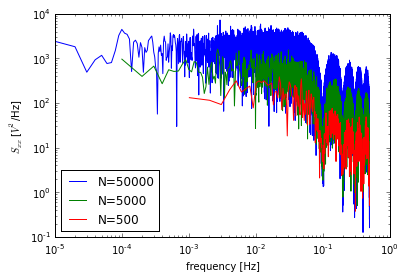

In [8]:
f = 0.5
b = 10

def dft(x, f=0.5, plot=True, lbl='R_xx'):
    n = len(x)
    ff = np.linspace(0,f,n) 
    t = np.arrange(n)
    ft = x*0.
    
    for i in np.arange(n):
        ft[i] = np.abs(np.sum(x * np.exp( -2j * np.pi * ff[i] * t)))
        
    if plot:
        plt.loglog(ff, ft, label=lbl) ; plt.xlabel('frequency [Hz]') ; plt.ylabel(r'$S_{xx}$ [$V^2$/Hz]')
        
    return ft

x_50000 = np.convolve(np.random.randn(50000), np.ones(b), mode='valid')
ft_50000 = dft(x_50000, f, lbl='N=50000')

x_5000 = np.convolve(np.random.randn(5000), np.ones(b), mode='valid')
ft_5000 = dft(x_5000, f, lbl='N=5000')

x_500 = np.convolve(np.random.randn(500), np.ones(b), mode='valid')
ft_500 = dft(x_500, f, lbl='N=500')

plt.legend(loc=3)

We see little improvement in the spectral density spectrum for higher orders of N > 5000 in that the noise doesn't improve for more data, we just extend the data set for more frequency data points.

<hr>
**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.
 <hr>

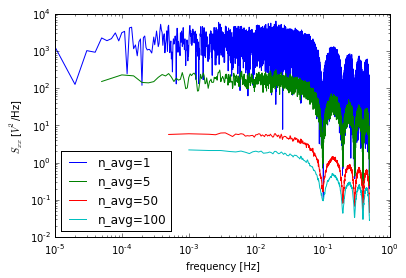

In [42]:
def sdf_avg(x, N, f, lbl='SDF'):
    
    x_sec = split(x, N)
    ft_avg = np.ndarray(shape=(N, len(x_sec[0])))
    ff = np.linspace(0,f,len(x_sec[0]))
    
    for i in range(N):
        ft_avg[i] = dft(x_sec[i], plot=False)
        
    ft = np.mean(ft_avg, axis=0) / N
    plt.loglog(ff, ft, label=lbl) ; plt.xlabel('frequency [Hz]') ; plt.ylabel(r'$S_{xx}$ [$V^2$/Hz]')
    
    
def split(arr, n):
    secs = len(arr) / n
    return [arr[i:i + secs] for i in range(0, len(arr), secs)]    

#sdf_avg(x_500, 5, f, lbl='N=500')
#sdf_avg(x_5000, 5, f, lbl='N=5000')

sdf_avg(x_50000, 1, f, lbl='n_avg=1')
sdf_avg(x_50000, 5, f, lbl='n_avg=5')
sdf_avg(x_50000, 50, f, lbl='n_avg=50')
sdf_avg(x_50000, 100, f, lbl='n_avg=100')

plt.legend(loc=3)

By averaging sections of the power spectrum together the noise is reduced significantly for splitting the spectrum into more sections.